# Exploration

In [1]:
from imports import *
from prepare import prep_data, basic_clean, lemmatize, remove_stopwords, split

In [2]:
# Getting data
df = pd.read_csv('data_science.csv')

In [3]:
# Initial cleaning
df = prep_data(df)

In [4]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['experience', 'ability', 'skill'])

In [5]:
def clean_skills(text):
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['year', 'experience', 'ability', 'skill', 'programming', 'language'])

In [6]:
df.requirements = df.requirements.apply(clean)
df.skills = df.skills.apply(clean_skills)
train, validate, test = split(df)
train.shape, validate.shape, test.shape

((128, 22), (56, 22), (46, 22))

In [7]:
df.requirements

0      bachelor degree minimum year 4 year demonstrates thorough andor proven record success ...
1      identify execute predictive model help internal team masterworks understand artist mar...
2      selfmotivated highly disciplined passionate discovering right therapeutic right patien...
3      2 year python java objectoriented programming language handson understanding objectori...
4      2 year work quantitative analysis tackle business problem strong analytical including ...
                                                 ...                                            
225    design implement support platform providing adhoc access large datasets interface tech...
226    implement tsql code line established architectural standard department understand rela...
227    learning equity investment business engaging directly investment professional automati...
228    collaborate across agile team design develop test implement support technical solution...
229    developing highscale ro

## Target Variable Univariate Analysis `label`

#### Train Label Percentages

In [8]:
labels = pd.concat([train.label.value_counts(),
                    train.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
g,116,0.90625
u,12,0.09375


In [9]:
train.head()

,company,location,mode,type,level,role,requirements,edu_bachelor,edu_master,edu_phd,...,associate,entry,mid_senior,analyst,engineer,maganer,scientist,edu_graduates,edu_u_dmnt,label
118,NYU Langone Health,"New York, NY",On-site,Full time,Entry,Data Engineer,qualify must master degree quantitative discipline biomedical informatics computer sci...,20,60,20,...,0,1,0,0,1,0,0,80,False,g
95,GM Financial,"Fort Worth, TX",Hybrid,Full time,Entry,Data Scientist,office required proficient python sa required strong written verbal presentation commu...,0,84,11,...,0,1,0,0,0,0,1,95,False,g
119,Fidelity Investments,"Merrimack, NH",On-site,Full time,Mid-Senior,Data Science Manager,minimum master degree engineering computer science mathematics computational statistic...,20,20,60,...,0,0,1,0,0,1,0,80,False,g
135,insitro,"South San Francisco, CA",On-site,Full time,Mid-Senior,Data Engineer,b phd computer science statistic mathematics physic engineering equivalent practical r...,21,42,32,...,0,0,1,0,1,0,0,74,False,g
41,McKinsey & Company,"Chicago, IL",On-site,Full time,Entry,Data Analyst,bachelor degree computer science engineering finance statistic equivalent area master'...,22,66,9,...,0,1,0,1,0,0,0,75,False,g


In [10]:
train.columns

Index(['company', 'location', 'mode', 'type', 'level', 'role', 'requirements',
       'edu_bachelor', 'edu_master', 'edu_phd', 'edu_other', 'skills',
       'associate', 'entry', 'mid_senior', 'analyst', 'engineer', 'maganer',
       'scientist', 'edu_graduates', 'edu_u_dmnt', 'label'],
      dtype='object')

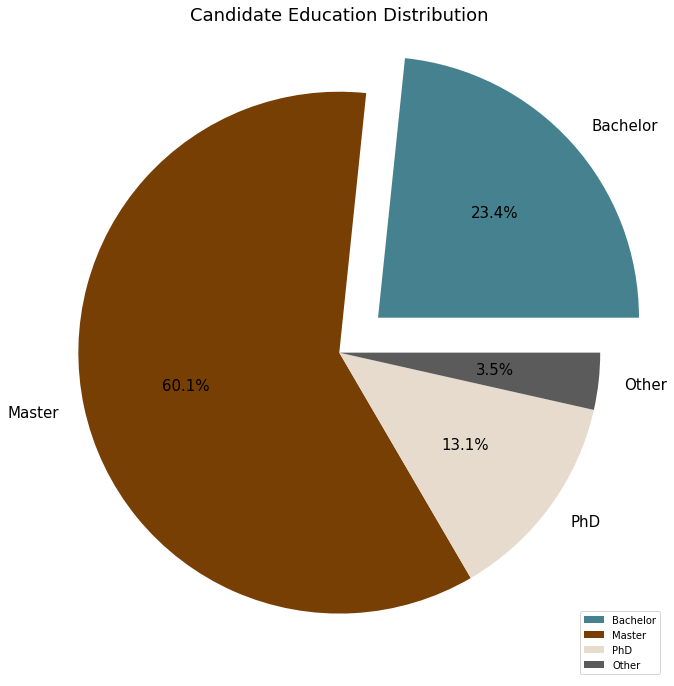

In [78]:
y = [train.edu_bachelor.sum(),train.edu_master.sum(), train.edu_phd.sum(), train.edu_other.sum()]
plt.figure(figsize=(16,12))
mylabels = ["Bachelor", "Master", 'PhD', 'Other']
myexplode = [0.2, 0, 0, 0]
mycolors = ['#45818e', '#783f04', '#e7dbcd', '#5b5b5b' ]
textprops = {"fontsize":15}
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Candidate Education Distribution',fontsize=18)
plt.show() 

## Requirements vs. Degree

In [12]:
all_text = ' '.join(train.requirements)
u_text = ' '.join(train[train.label == 'u'].requirements)
g_text = ' '.join(train[train.label == 'g'].requirements)
all_text = clean(all_text)
u_text = clean(u_text)
g_text = clean(g_text)

In [13]:
pd.Series(all_text.split()).value_counts().head(20)

data           524
year           168
science        164
analytics      133
degree         125
business       116
python         104
working        102
sql             99
statistic       94
team            92
analysis        92
engineering     91
field           90
learning        88
tool            79
knowledge       79
strong          75
etc             75
computer        73
dtype: int64

In [14]:
all_freq = pd.Series(all_text.split()).value_counts()
u_freq = pd.Series(u_text.split()).value_counts()
g_freq = pd.Series(g_text.split()).value_counts()

In [15]:
word_counts = pd.concat([all_freq, u_freq, g_freq], sort=True, axis=1)
word_counts.columns = ['all', 'u', 'g']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [16]:
word_counts.sort_values(by='all', ascending=False)

,all,u,g
data,524,99,425
year,168,30,138
science,164,27,137
analytics,133,6,127
degree,125,17,108
...,...,...,...
hot,1,0,1
hmmer,1,0,1
hit,1,0,1
history,1,0,1


In [17]:
word_counts.assign(p_u=word_counts.u / word_counts['all'],p_g=word_counts.g / word_counts['all'])

,all,u,g,p_u,p_g
0,1,1,0,1.0,0.0
01,1,0,1,0.0,1.0
02,1,0,1,0.0,1.0
1,15,3,12,0.2,0.8
10,3,0,3,0.0,1.0
...,...,...,...,...,...
youre,1,0,1,0.0,1.0
youve,2,0,2,0.0,1.0
z,1,0,1,0.0,1.0
zero,1,0,1,0.0,1.0


<AxesSubplot:>

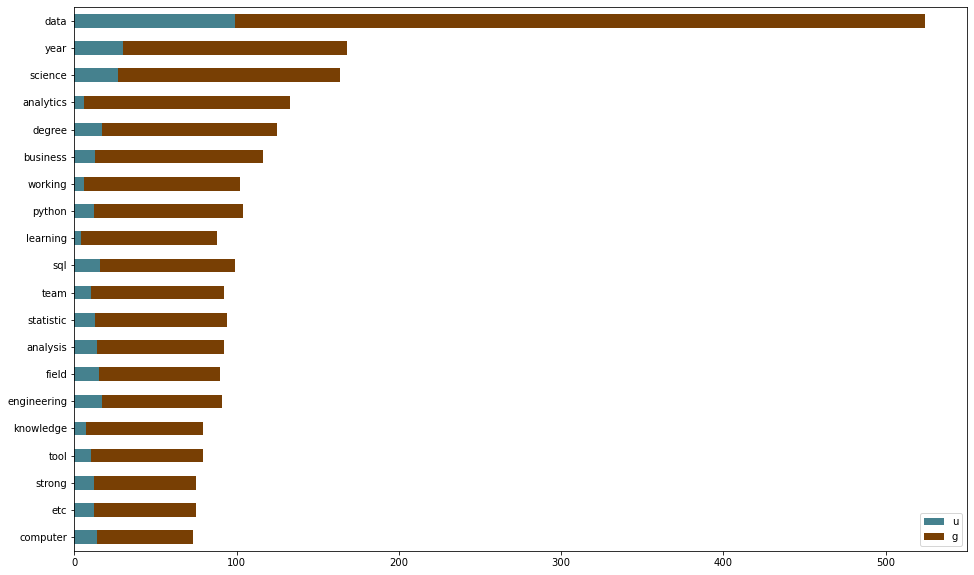

In [80]:
word_counts.assign(p_u=word_counts.u / word_counts['all'],p_g=word_counts.g / word_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['u', 'g']]\
    .sort_values(by='g')\
    .plot.barh(stacked=True, figsize = (16,10), color = ['#45818e', '#783f04'])

In [19]:
word_counts[(word_counts.u > 10) & (word_counts.g > 10)]\
    .assign(ratio=lambda df: df.u/df.g)\
    .sort_values(by='ratio')

,all,u,g,ratio
business,116,13,103,0.126214
python,104,12,92,0.130435
degree,125,17,108,0.157407
statistic,94,13,81,0.160494
analysis,92,14,78,0.179487
strong,75,12,63,0.190476
etc,75,12,63,0.190476
sql,99,16,83,0.192771
science,164,27,137,0.197080
field,90,15,75,0.200000


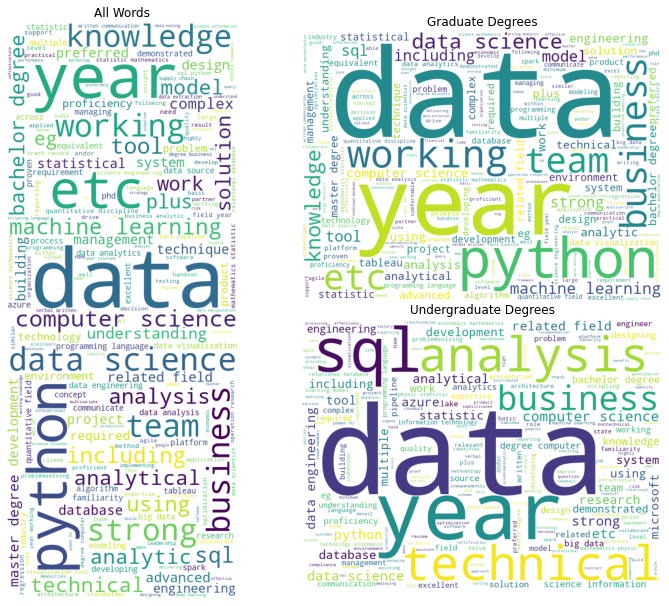

In [20]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_text)
g_cloud = WordCloud(background_color='white', height=600, width=800).generate(g_text)
u_cloud = WordCloud(background_color='white', height=600, width=800).generate(u_text)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(g_cloud)
axs[2].imshow(u_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Graduate Degrees')
axs[2].set_title('Undergraduate Degrees')

for ax in axs: ax.axis('off')

### Bigrams

In [21]:
pd.Series(nltk.ngrams(all_text.split(), 2)).value_counts().head(20)

(data, science)            75
(computer, science)        67
(machine, learning)        61
(related, field)           39
(2, year)                  37
(3, year)                  36
(bachelor, degree)         34
(master, degree)           28
(data, visualization)      28
(programming, language)    28
(data, analytics)          26
(data, engineering)        24
(data, analysis)           24
(python, r)                22
(quantitative, field)      22
(data, source)             21
(5, year)                  21
(analytics, data)          20
(year, data)               20
(big, data)                20
dtype: int64

#### Graduate Degrees

In [22]:
top_20_g_bigrams = (pd.Series(nltk.ngrams(g_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_g_bigrams.head()

(data, science)        63
(machine, learning)    58
(computer, science)    54
(bachelor, degree)     32
(2, year)              32
dtype: int64

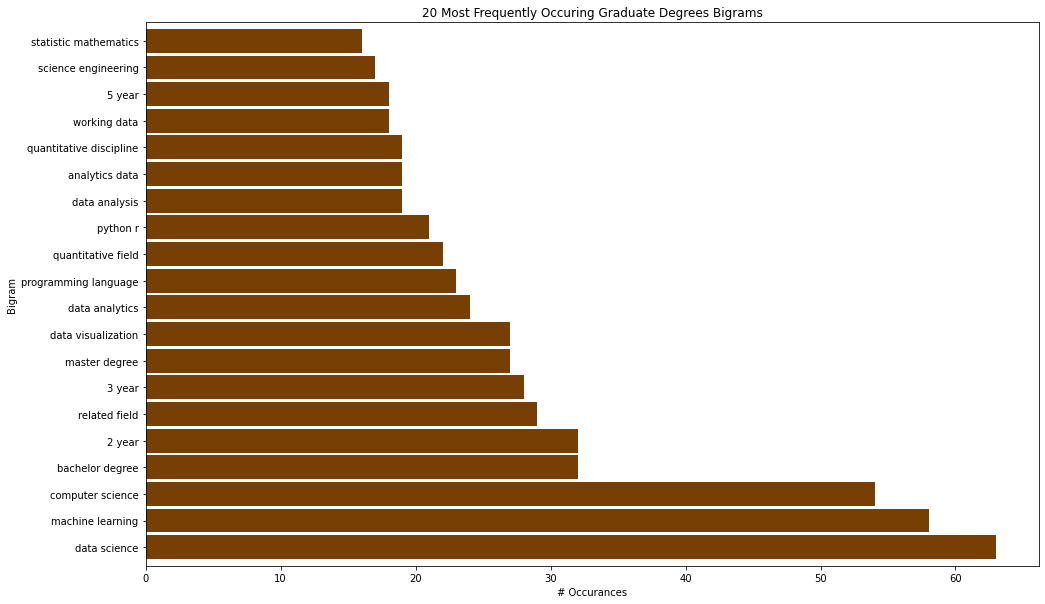

In [64]:
top_20_g_bigrams.sort_values(ascending=False).plot.barh(color='#783f04', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Graduate Degrees Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_g_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

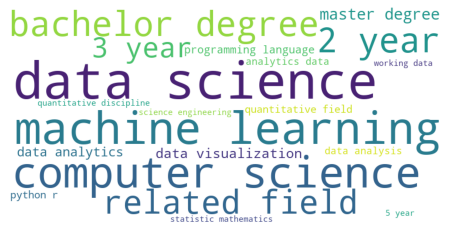

In [24]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_g_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Undergraduate Degrees

In [25]:
top_20_u_bigrams = (pd.Series(nltk.ngrams(u_text.split(), 2))
                      .value_counts()
                      .head(20))

top_20_u_bigrams.head()

(computer, science)    13
(data, science)        12
(data, engineering)    10
(related, field)       10
(3, year)               8
dtype: int64

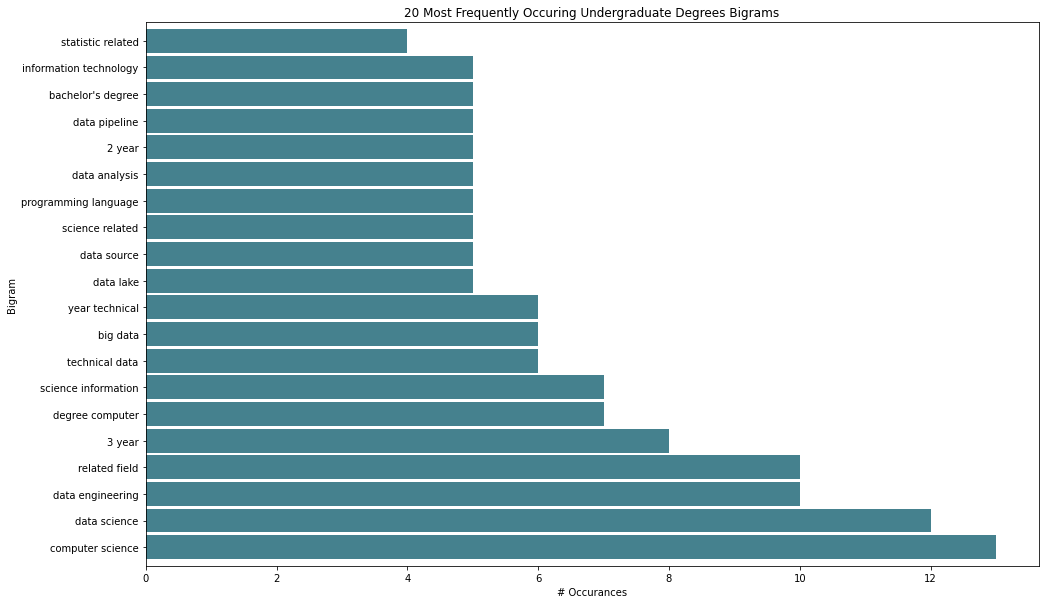

In [65]:
top_20_u_bigrams.sort_values(ascending=False).plot.barh(color='#45818e', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Undergraduate Degrees Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_u_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

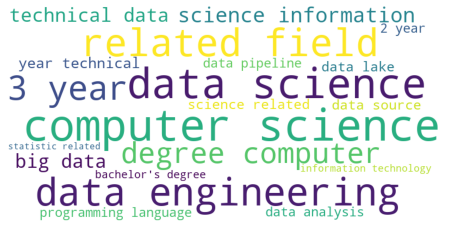

In [27]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_u_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

***

## Role vs. Degree

In [28]:
df.role.value_counts()

Data Scientist          90
Data Analyst            62
Data Engineer           46
Data Science Manager    32
Name: role, dtype: int64

In [29]:
train.role.value_counts()

Data Scientist          49
Data Analyst            34
Data Engineer           23
Data Science Manager    22
Name: role, dtype: int64

In [30]:
train.groupby('role').label.value_counts()

role                  label
Data Analyst          g        31
                      u         3
Data Engineer         g        17
                      u         6
Data Science Manager  g        21
                      u         1
Data Scientist        g        47
                      u         2
Name: label, dtype: int64

<AxesSubplot:xlabel='role', ylabel='count'>

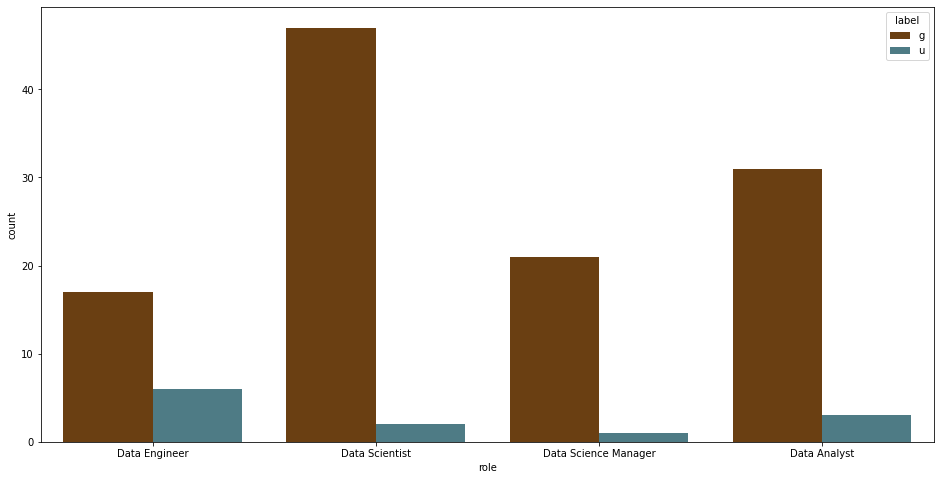

In [76]:
plt.figure(figsize = (16,8))
sns.countplot(x='role', hue='label', data=train, palette= ['#783f04','#45818e'])

***

## Skills vs. Degree

In [32]:
# Separating skills into 3 Series: all, b, h
all_skills = ' '.join(train.skills)
u_skills = ' '.join(train[train.label == 'u'].skills)
g_skills = ' '.join(train[train.label == 'g'].skills)
all_skills = clean(all_skills)
u_skills = clean_skills(u_skills)
g_skills = clean_skills(g_skills)

In [33]:
pd.Series(all_skills.split()).value_counts().head(20)

data          128
sql           121
microsoft     106
python         78
learning       69
c              63
machine        60
analysis       49
r              40
leadership     29
modeling       27
javascript     25
server         25
excel          25
tableau        24
software       23
management     22
analytics      22
science        22
research       21
dtype: int64

In [34]:
all_skills_freq = pd.Series(all_skills.split()).value_counts()
u_skills_freq = pd.Series(u_skills.split()).value_counts()
g_skills_freq = pd.Series(g_skills.split()).value_counts()

In [35]:
skill_counts = pd.concat([all_skills_freq, u_skills_freq, g_skills_freq], sort=True, axis=1)
skill_counts.columns = ['all', 'u', 'g']
skill_counts = skill_counts.fillna(0).apply(lambda s: s.astype(int))

In [36]:
skill_counts.sort_values(by='all', ascending=False)

,all,u,g
data,128,15,113
sql,121,12,109
microsoft,106,5,101
python,78,8,70
learning,69,4,65
...,...,...,...
javase,1,1,0
chemistry,1,0,1
cassandra,1,0,1
domain,1,0,1


<AxesSubplot:>

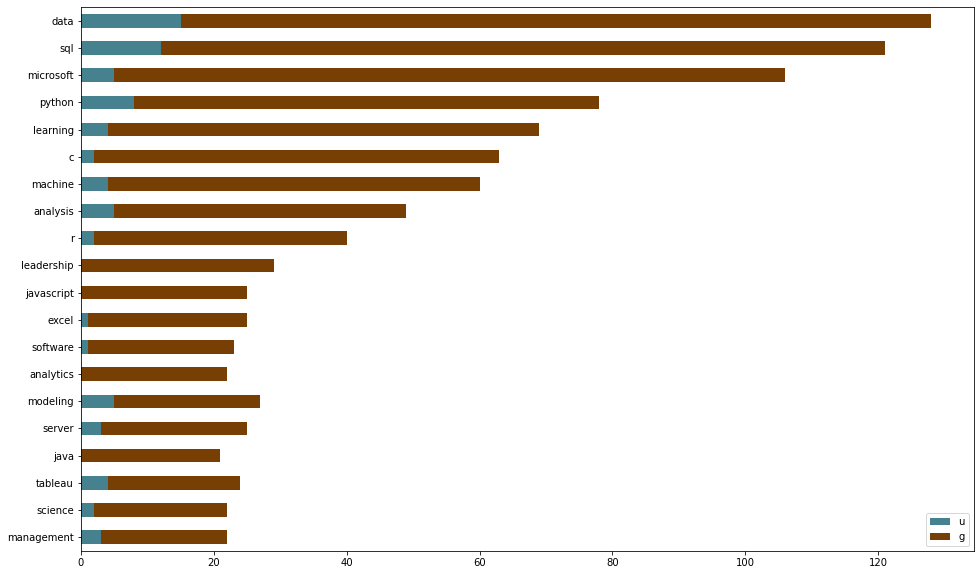

In [81]:
skill_counts.assign(p_u=skill_counts.u / skill_counts['all'],p_g=skill_counts.g / skill_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['u', 'g']]\
    .sort_values(by='g')\
    .plot.barh(stacked=True, figsize = (16,10), color = ['#45818e', '#783f04'])

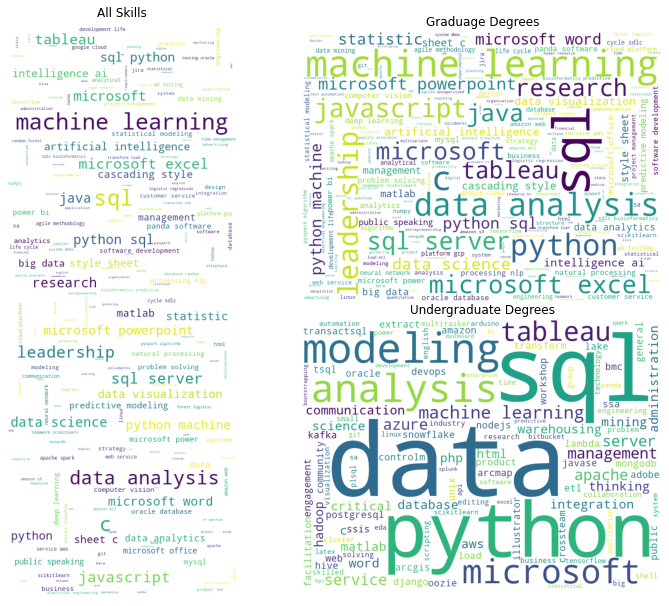

In [39]:
all_skills_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_skills)
g_skills_cloud = WordCloud(background_color='white', height=600, width=800).generate(g_skills)
u_skills_cloud = WordCloud(background_color='white', height=600, width=800).generate(u_skills)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_skills_cloud)
axs[1].imshow(g_skills_cloud)
axs[2].imshow(u_skills_cloud)

axs[0].set_title('All Skills')
axs[1].set_title('Graduage Degrees')
axs[2].set_title('Undergraduate Degrees')

for ax in axs: ax.axis('off')

### Bigrams

In [40]:
pd.Series(nltk.ngrams(all_skills.split(), 2)).value_counts().head(20)

(machine, learning)           58
(data, analysis)              42
(sql, server)                 25
(microsoft, excel)            24
(python, sql)                 21
(data, science)               21
(microsoft, powerpoint)       20
(sql, python)                 20
(microsoft, sql)              20
(microsoft, word)             19
(python, machine)             19
(data, visualization)         18
(intelligence, ai)            17
(artificial, intelligence)    17
(style, sheet)                16
(sheet, c)                    16
(cascading, style)            16
(big, data)                   14
(data, analytics)             13
(predictive, modeling)        12
dtype: int64

#### Higher Education

In [41]:
top_20_g_skill_bigrams = (pd.Series(nltk.ngrams(g_skills.split(), 2))
                      .value_counts()
                      .head(20))

top_20_g_skill_bigrams.head()

(machine, learning)        54
(data, analysis)           39
(microsoft, excel)         23
(sql, server)              22
(microsoft, powerpoint)    20
dtype: int64

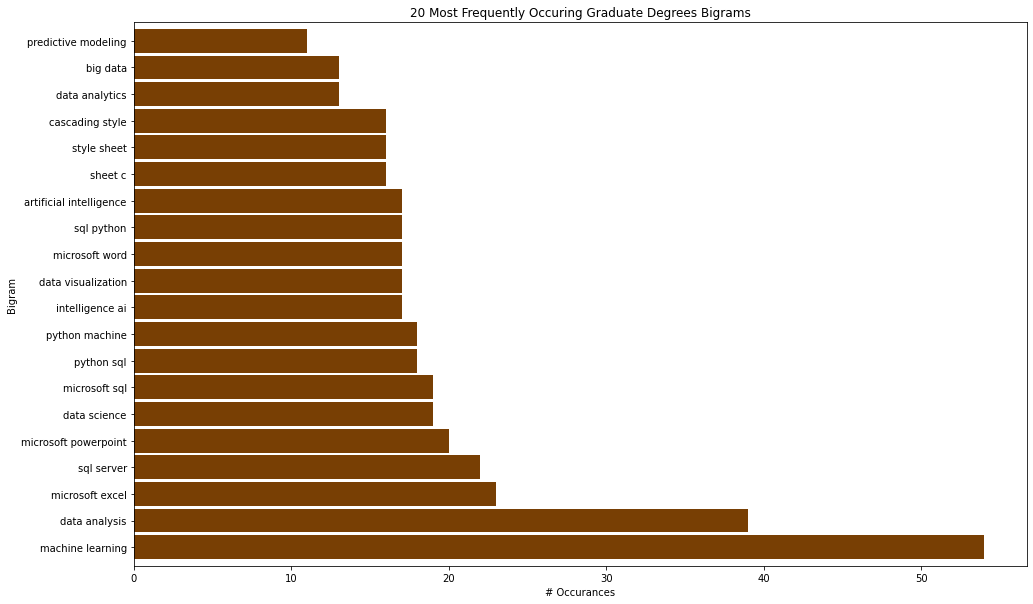

In [84]:
top_20_g_skill_bigrams.sort_values(ascending=False).plot.barh(color='#783f04', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Graduate Degrees Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_g_skill_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

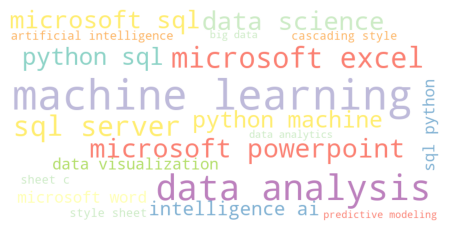

In [43]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_g_skill_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400, colormap='Set3').generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Bachelor

In [44]:
top_20_u_skill_bigrams = (pd.Series(nltk.ngrams(u_skills.split(), 2))
                      .value_counts()
                      .head(20))

top_20_u_skill_bigrams.head()

(machine, learning)    4
(python, sql)          3
(data, analysis)       3
(sql, server)          3
(sql, python)          3
dtype: int64

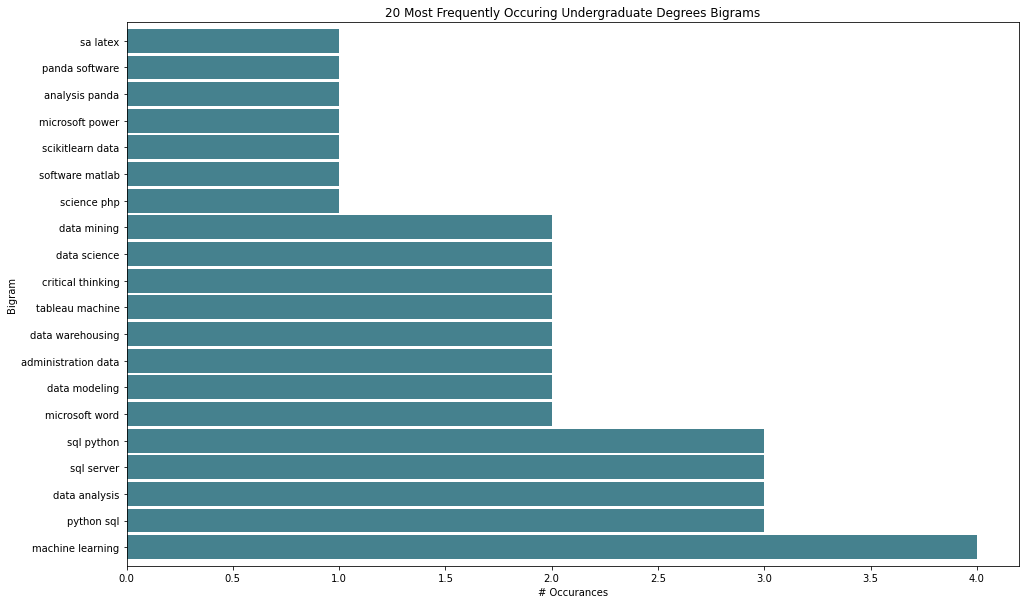

In [83]:
top_20_u_skill_bigrams.sort_values(ascending=False).plot.barh(color='#45818e', width=.9, figsize=(16, 10))

plt.title('20 Most Frequently Occuring Undergraduate Degrees Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_u_skill_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

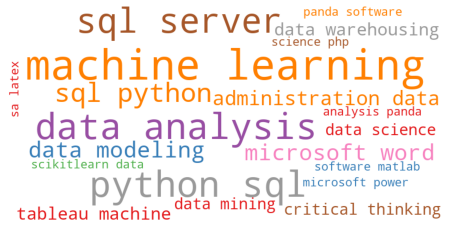

In [46]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_u_skill_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400,  colormap='Set1').generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
train.label.value_counts()